In [ ]:
## Отчет по лабораторной работе № 3
### Метод к-ближайших соседей
    Метод k-ближайших соседей — метрический алгоритм для автоматической классификации объектов. При классификации объект присваивается тому классу, который 
    является наиболее распространённым среди k соседей данного элемента, классы которых уже известны. Алгоритм может быть применим к выборкам с большим 
    количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния; классический вариант такой функции нахождение 
    эвклидова расстояния.
    Евклидово расстояние — расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора. 
$$
d(p,d)=\sqrt{\sum_{k = 1}^{n}{(p_{k} - q_{k})}^{2}}\
$$

### Наивный байесовский алгоритм
    Наивный байесовский алгоритм – это алгоритм классификации, основанный на теореме Байеса с допущением о независимости признаков. 
$$   
P\left( A \middle| B \right) = \frac{P\left( B \middle| A \right)*P(A)}{P(B)}
$$
* P(A|B) - вероятность гипотезы А при наступлении события В, т. е. вероятность А, когда В уже верно;
* P(B|A) - вероятность наступления события В, если гипотеза А верна;
* P(A) - вероятность того, что гипотеза А верна;
* P(B) - вероятность наступления события В;

    В задачах классификации данная теорема рассматривается следующим образом: В — один набор признаков. А — вероятность того, что набор В принадлежит к 
    определенному классу. Наивный байесовский алгоритм предполагает, что наличие какого-либо признака в классе не связано с наличием какого-либо другого признака. 
    
### SVM    

    SVM отличается от других алгоритмов классификации тем, что он выбирает границу принятия решения , которая максимизирует расстояние от ближайших точек данных 
    всех классов. SVM не просто находит границу принятия решения; он находит наиболее оптимальную границу принятия решения. Наиболее оптимальной границей 
    принятия решения является та, которая имеет максимальный запас от ближайших точек всех классов. Ближайшие точки от границы решения, максимизирующие 
    расстояние между границей решения и точками, называются опорными векторами. Граница принятия решения в случае машин с опорными векторами 
    называется классификатором максимальной маржи или гиперплоскостью максимальной маржи.
### Исходные данные
![csv файл](src.jpg)
![исходные данные](firm_source.jpg)
### Визуализация метода опорных векторов
![метод опорных векторов](firm_source_svm.jpg) 

In [1]:
import numpy as np

x1 = np.array([750, 360, 720, 540, 570, 520, 590, 670, 620, 690, 610, 550, 590, 740, 670, 560, 540, 590, 590, 470, 560, 540, 400])
x2 = np.array([590, 600, 750, 710, 700, 670, 790, 700, 730, 840, 680, 730, 750, 680, 600, 550, 520, 540, 700, 600, 540, 630, 600])
cl = np.array([0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,    1,  1,   1,   1,   1,   1])
#с1 =
#с2 = 
#0 - не уклоняются
#1 - уклоняются
len(cl)

23

In [2]:
import pandas as pd

columns = ['x1','x2','class']
df = pd.DataFrame(data={"x1": x1,'x2': x2, 'class': cl })
df.to_csv(r'./firms.csv',sep=',',index=False)
df

,x1,x2,class
0,750,590,0
1,360,600,0
2,720,750,0
3,540,710,0
4,570,700,0
5,520,670,0
6,590,790,0
7,670,700,0
8,620,730,0
9,690,840,0


In [3]:
tax = df["class"] == 0
df_tax = df[tax].drop(columns=['class'])
df_tax

,x1,x2
0,750,590
1,360,600
2,720,750
3,540,710
4,570,700
5,520,670
6,590,790
7,670,700
8,620,730
9,690,840


In [4]:
tax = df_tax.values.tolist()
tax

[[750, 590],
 [360, 600],
 [720, 750],
 [540, 710],
 [570, 700],
 [520, 670],
 [590, 790],
 [670, 700],
 [620, 730],
 [690, 840],
 [610, 680],
 [550, 730],
 [590, 750]]

In [5]:
nottax = df["class"] == 1
df_nottax = df[nottax].drop(columns=['class'])
df_nottax

,x1,x2
13,740,680
14,670,600
15,560,550
16,540,520
17,590,540
18,590,700
19,470,600
20,560,540
21,540,630
22,400,600


In [6]:
nottax = df_nottax.values.tolist()
nottax

[[740, 680],
 [670, 600],
 [560, 550],
 [540, 520],
 [590, 540],
 [590, 700],
 [470, 600],
 [560, 540],
 [540, 630],
 [400, 600]]

In [7]:
Mtax = [np.mean(tax[0]), np.mean(tax[1])]
Mnottax = [np.mean(nottax[0]), np.mean(nottax[1])]
Mnottax

[710.0, 635.0]

In [8]:
stdtax0 = np.std(tax[0])
stdtax1 = np.std(tax[1])
stdnottax0 = np.std(nottax[0])
stdnottax1 = np.std(nottax[1])
stdnottax0

30.0

In [10]:
np.corrcoef(tax[0], tax[1])
np.corrcoef(nottax[0], nottax[1])

array([[1., 1.],
       [1., 1.]])

In [13]:
np.linalg.det(np.corrcoef(tax[0], tax[1]))
#np.linalg.det(np.corrcoef(nottax[0], nottax[1]))

0.0

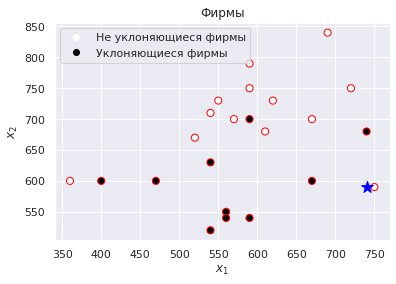

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

classes = ['Не уклоняющиеся фирмы', 'Уклоняющиеся фирмы']
scatter = plt.scatter(x1, x2, c=cl, edgecolor="red", s=50, cmap='Greys', label = classes)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.scatter(740, 590,s=150, marker='*',color = 'blue')
plt.ylabel('$x_{2}$') 
plt.xlabel('$x_{1}$') 
plt.title("Фирмы")
plt.savefig('firm_source.jpg')
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB

x = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы
y = cl

clf = GaussianNB(var_smoothing = 1.1)
clf.fit(x, y)
print(clf.predict([[740, 590]]))

[0]


In [6]:
clf = GaussianNB()
clf.fit(x, y)
print(clf.predict([[740, 590]]))

[1]


In [14]:
from sklearn import svm

x = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы
y = cl

clf = svm.SVC(gamma='scale')#auto scale C=1.0, degree = 3, max_iter = -1, probability = True
clf.fit(x, y)  

print(clf.predict([[740, 590]]))

[0]


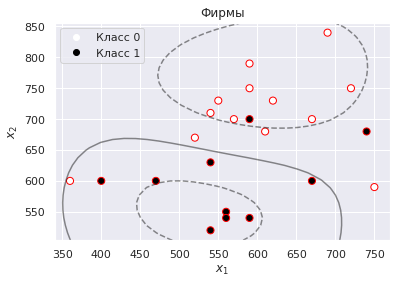

In [21]:
plt.scatter(x1, x2, c=cl, edgecolor="red", s=50, cmap='Greys', label = classes)

def plot_svc(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

# create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-0.9, 0, 0.9], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none')#, edgecolors='k'
    classes = ['Класс 0', 'Класс 1']
    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.ylabel('$x_{2}$') 
    plt.xlabel('$x_{1}$') 
    plt.title("Фирмы")
    plt.savefig('firm_source_svm.jpg')
    plt.show()
    
plot_svc(clf, plt.gca())

In [20]:
from sklearn.neighbors import KNeighborsClassifier

x = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы
y = cl

clf = KNeighborsClassifier(n_neighbors=2, weights = 'distance', p = 2) #/uniform  distance/ algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}  algorithm = 'brute'
clf.fit(x,y)


print(clf.predict([[740, 590]]))

[0]


# Литература
* Scikit-learn. Веб-сайт. Classifier implementing the k-nearest neighbors vote. — Режим доступа:[scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),свободный. — Загл. с экрана.
* Scikit-learn. Веб-сайт. Support Vector Machines. — Режим доступа:[scikit-learn.org](https://scikit-learn.org/stable/modules/svm.html),свободный. — Загл. с экрана.
* Scikit-learn. Веб-сайт. Naive Bayes. — Режим доступа:[scikit-learn.org](https://scikit-learn.org/stable/modules/naive_bayes.html),свободный. — Загл. с экрана.
* Wikipedia. Веб-сайт. Метод k-ближайших соседей. — Режим доступа:[ru.wikipedia.org](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9),свободный. — Загл. с экрана.   
* Wikipedia. Веб-сайт. Евклидова метрика. — Режим доступа:[ru.wikipedia.org](https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D0%BA%D0%BB%D0%B8%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B0),свободный. — Загл. с экрана.

GaussianNB()
[0]


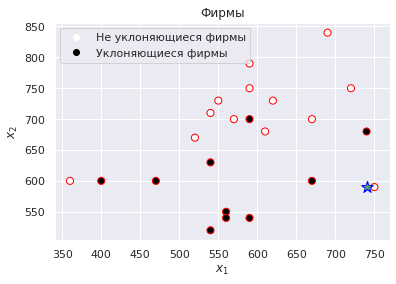

In [17]:
from sklearn.naive_bayes import GaussianNB

X1 = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы
Y1 = cl

clf = GaussianNB()
clf.fit(X1, Y1)
print(clf.fit(X1, Y1))

#plt.scatter(X1[:,0],X1[:,1], c=Y1, edgecolor="grey", s=50, cmap='coolwarm') # Красные точки - уклоняются от налогов
classes = ['Не уклоняющиеся фирмы', 'Уклоняющиеся фирмы']
scatter = plt.scatter(x1, x2, c=Y1, edgecolor="red", s=50, cmap='Greys', label = classes)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.scatter(740, 590,s=150, marker='*',color = 'blue')
plt.plot(740, 590, '*', color='g')
plt.ylabel('$x_{2}$') 
plt.xlabel('$x_{1}$') 
plt.title("Фирмы")

print(clf_pf.predict([[740, 590]]))

[0]


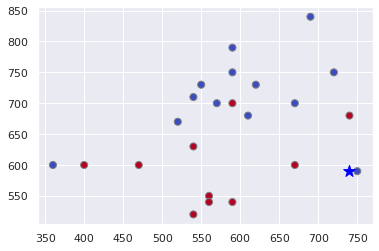

In [10]:
from sklearn import svm

X = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы
Y = cl

clf = svm.SVC(gamma='scale')
clf.fit(X, Y)  

plt.scatter(X1[:,0],X1[:,1], c=Y1, edgecolor="grey", s=50, cmap='coolwarm') # Красные точки - уклоняются от налогов
#plt.plot(740, 590, '*', color='g')
plt.scatter(740, 590,s=150, marker='*',color = 'blue')

print(clf.predict([[740, 590]]))

[0]


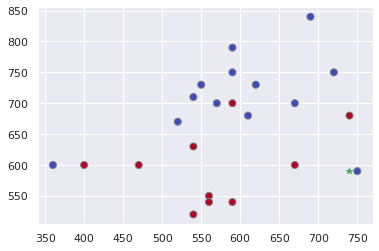

In [48]:
from sklearn.neighbors import KNeighborsClassifier

X = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы
Y = cl

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X,Y)

plt.scatter(X1[:,0],X1[:,1], c=Y1, edgecolor="grey", s=50, cmap='coolwarm') # Красные точки - уклоняются от налогов
plt.plot(740, 590, '*', color='g')

print(clf.predict([[740, 590]]))

GaussianNB()
[1]


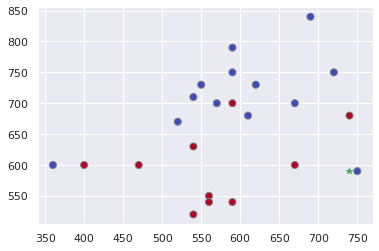

In [5]:
from sklearn.naive_bayes import GaussianNB

X1 = np.column_stack((x1,x2))  #np.dstack((x1,x2)) Аналог, объединяем два массива в один попарно элементы

Y1 = cl

clf = GaussianNB()
clf.fit(X1, Y1)
print(clf.fit(X1, Y1))
clf_pf = GaussianNB()
#clf_pf.partial_fit(X1, Y1, np.unique(Y1))

clf_pf.fit(X1, Y1).predict([[740, 590]])
print(clf_pf.fit(X1, Y1).predict([[740, 590]]))


plt.scatter(X1[:,0],X1[:,1], c=Y1, edgecolor="grey", s=50, cmap='coolwarm') # Красные точки - уклоняются от налогов
plt.plot(740, 590, '*', color='g')


print(clf_pf.predict([[740, 590]]))